# Determining important factors for successful movies post 2010

## Introduction

In this notebook we will explore some of the characteristics of the most successful movies from the last 

In [473]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [474]:
from data_cleaner import clean_movie_budgets
from data_cleaner import clean_tmdb_movies
from data_cleaner import join_dataframes

In [475]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [476]:
#movie_gross_df = pd.read_csv('data/bom.movie_gross.csv')
# name_df = pd.read_csv('data/imdb.name.basics.csv')
# title_akas_df = pd.read_csv('data/imdb.title.akas.csv')
# title_basics_df = pd.read_csv('data/imdb.title.basics.csv')
# title_crew_df = pd.read_csv('data/imdb.title.crew.csv')
# title_principals_df = pd.read_csv('data/imdb.title.principals.csv')
# title_ratings_df = pd.read_csv('data/imdb.title.ratings.csv')
# rt_movie_info_df = pd.read_csv('data/rt.movie_info.tsv', delimiter='\t')
# rt_reviews_df = pd.read_csv('data/rt.reviews.tsv', encoding='windows-1254', delimiter='\t')
tmdb_movies_df = pd.read_csv('data/tmdb.movies.csv')
tn_budgets_df = pd.read_csv('data/tn.movie_budgets.csv')

In [477]:
clean_tmdb_movies_df = clean_tmdb_movies(tmdb_movies_df)
clean_tn_budgets_df = clean_movie_budgets(tn_budgets_df)

In [478]:
joined_movies_df = join_dataframes(clean_tmdb_movies_df, clean_tn_budgets_df)

In [733]:
movies_top_100_df.sort_values('vote_average', ascending = False)

,genre_ids,popularity,vote_average,vote_count,production_budget ($M),domestic_gross ($M),worldwide_gross ($M),domestic_production_ratio,worldwide_production_ratio,worldwide_domestic_ratio
title,,,,,,,,,,
Whiplash,"[drama, music]",28.784,8.4,7908,3.3,13.1,39.0,3.97,11.82,2.98
Avengers: Infinity War,"[adventure, action, fantasy]",80.773,8.3,13948,300.0,678.8,2048.1,2.26,6.83,3.02
Green Book,"[drama, comedy]",36.284,8.3,3499,23.0,85.1,322.0,3.70,14.00,3.78
Inception,"[action, sci-fi, adventure]",27.920,8.3,22186,160.0,292.6,835.5,1.83,5.22,2.86
Coco,"[animated, family, comedy, adventure, fantasy]",25.961,8.2,8669,175.0,209.7,798.0,1.20,4.56,3.81
...,...,...,...,...,...,...,...,...,...,...
Fifty Shades Freed,"[drama, mystery]",22.512,6.1,3535,55.0,100.4,371.4,1.83,6.75,3.70
San Andreas,"[action, drama, thriller]",27.414,6.1,5125,110.0,155.2,456.3,1.41,4.15,2.94
The First Purge,"[action, sci-fi, thriller, horror]",28.440,5.8,1846,13.0,69.5,136.6,5.35,10.51,1.97


In [609]:
movies_top_50_df = joined_movies_df.sort_values(by = 'popularity', ascending = False).iloc[:51]

In [767]:
vote_avg_df = movies_top_100_df.groupby(pd.cut(movies_top_100_df['vote_average'],
                                                    bins=np.arange(5.5, 9, step=.8),
                           include_lowest=False))['worldwide_gross ($M)'].agg(['count','mean'])

In [727]:
"""
x_axis and y_axis are column names in the joined data frame
genres is a list of genres to get information about
"""
def make_regplots(df, x_axis, y_axis, genres):
    fig, axs = plt.subplots(2,2, figsize = (16,12))
    for i, genre in enumerate(genres):
        row = i//2
        col = i%2
        #axs[row,col].set_xlim(0,350)
        #axs[row,col].set_ylim(0,2000)
        axs[row,col].set_title(f'Worldwide Gross \n vs Average Rating for {genre}')
        plot_df = df[df['genre_ids'].apply(lambda x: genre in x)]
        sns.scatterplot(plot_df[x_axis],plot_df[y_axis], 
                    ax = axs[row,col])
        
    plt.tight_layout()

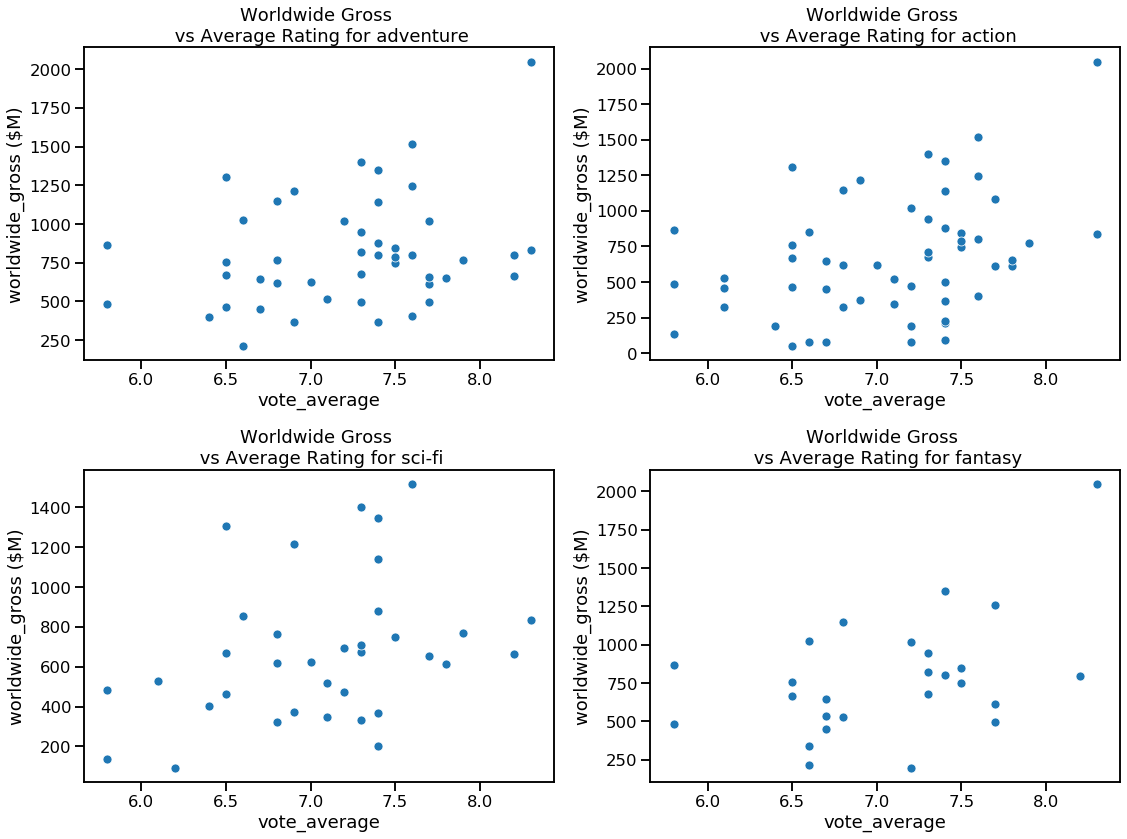

In [730]:
sns.set_context("talk")
make_regplots(movies_top_100_df, 'vote_average', 'worldwide_gross ($M)',
              ['adventure', 'action', 'sci-fi', 'fantasy'])

plt.savefig('Worldwide gross vs rating.png')

In [683]:
def plot_genre_stats(df, col_name):
    #genres = None
    col_name_dict = {}
    genre_count_dict = {}
    
    for i, genres in enumerate(df.genre_ids):
        for genre in genres:
            if genre not in col_name_dict.keys():
                col_name_dict[genre] = df[col_name].iloc[i]
                genre_count_dict[genre] = 1
            else:
                col_name_dict[genre] += df[col_name].iloc[i]
                genre_count_dict[genre] += 1
                
    avg_stats = {k: col_name_dict[k] / genre_count_dict[k] for k \
               in col_name_dict if k in genre_count_dict}
    
    sorted_stats = sorted(avg_stats.items(), key = lambda kv: kv[1])
    genres, stats = zip(*sorted_stats)
    
    lbound = len(genre_count_dict) - 10
    ubound = len(genre_count_dict)
    
    print(genre_count_dict)
    
    plt.figure(figsize = (12,4))
    plt.barh(range(len(avg_stats))[lbound:ubound], stats[lbound:ubound], align = 'center')
    plt.yticks(range(len(avg_stats))[lbound:ubound], genres[lbound:ubound]);
    plt.title(f'Average {col_name} for top 100 Movies by Genre')
    plt.ylabel('Genre')
    plt.xlabel(f'Average {col_name}')

In [684]:
def plot_genre_counts(df):
    genres = None
    genre_count_dict = {}
    
    for i, genres in enumerate(df.genre_ids):
        for genre in genres:
            if genre not in genre_count_dict:
                genre_count_dict[genre] = 1
            else:
                genre_count_dict[genre] += 1
                
    sorted_genre_counts = sorted(genre_count_dict.items(), key = lambda kv: kv[1])
    genres, counts = zip(*sorted_genre_counts)
    
    lbound = len(genre_count_dict) - 10
    ubound = len(genre_count_dict)
    
    print(sorted_genre_counts)
    
    plt.figure(figsize = (12,4))
    plt.barh(range(len(genre_count_dict))[lbound:ubound], counts[lbound:ubound], align = 'center')
    plt.yticks(range(len(genre_count_dict))[lbound:ubound], genres[lbound:ubound]);
    plt.title(f'Number of Genre Appearances in the Top 100 Most Popular Movies')
    plt.ylabel('Genre')
    plt.xlabel(f'Counts')

In [685]:
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.labelweight'] = 'normal'
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 12

[('music', 2), ('history', 4), ('war', 5), ('horror', 7), ('mystery', 11), ('crime', 11), ('animated', 14), ('family', 18), ('comedy', 23), ('thriller', 25), ('fantasy', 26), ('sci-fi', 35), ('drama', 37), ('adventure', 46), ('action', 55)]


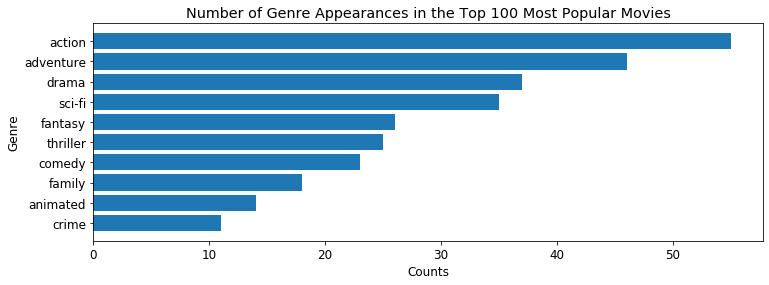

In [686]:
plot_genre_counts(movies_top_100_df)

{'adventure': 73, 'action': 94, 'fantasy': 37, 'thriller': 62, 'sci-fi': 53, 'drama': 66, 'comedy': 54, 'music': 3, 'mystery': 30, 'family': 36, 'animated': 27, 'crime': 27, 'history': 6, 'war': 7, 'horror': 21, 'western': 3}


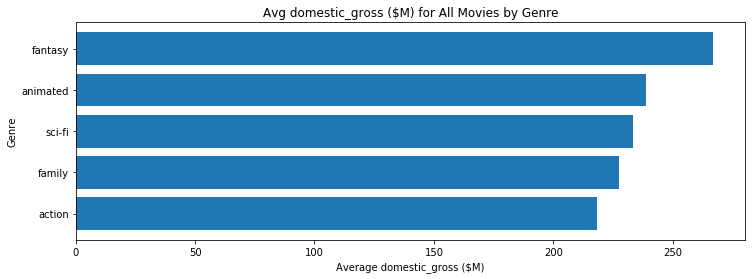

In [608]:
plot_genre_stats(movies_top_200_df, 'domestic_gross ($M)')

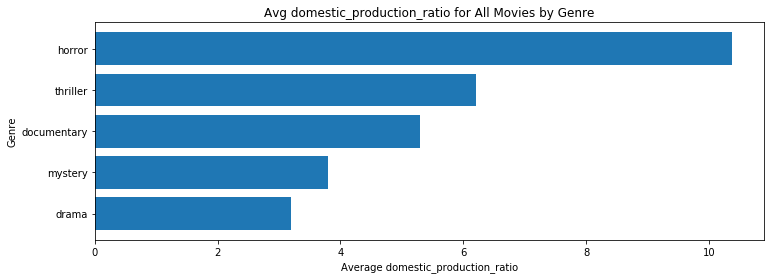

In [497]:
plot_genre_stats('domestic_production_ratio')

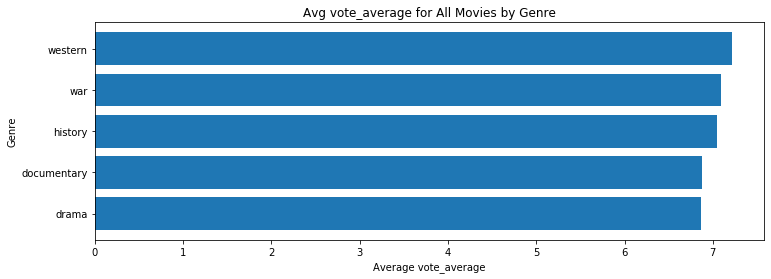

In [498]:
#Not correct. Needs to have vote count filtered
plot_genre_stats('vote_average')

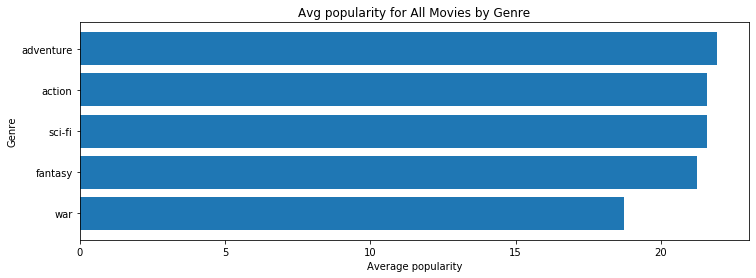

In [507]:
plot_genre_stats('popularity')

In [500]:
joined_movies_df.head()

,genre_ids,popularity,vote_average,vote_count,production_budget ($M),domestic_gross ($M),worldwide_gross ($M),domestic_production_ratio,worldwide_production_ratio,worldwide_domestic_ratio
title,,,,,,,,,,
10 Cloverfield Lane,"[thriller, sci-fi, drama]",17.892,6.9,4629,5.0,72.1,108.3,14.42,21.66,1.50
12 Strong,"[war, drama, history, action]",13.183,5.6,1312,35.0,45.8,71.1,1.31,2.03,1.55
12 Years a Slave,"[drama, history]",16.493,7.9,6631,20.0,56.7,181.0,2.84,9.05,3.19
127 Hours,"[adventure, drama, thriller]",11.435,7.0,4469,18.0,18.3,60.2,1.02,3.34,3.29
13 Hours: The Secret Soldiers of Benghazi,"[action, drama, history, thriller, war]",21.486,7.0,1573,50.0,52.9,69.4,1.06,1.39,1.31
